# Read in Data

In [83]:
import pandas as pd

data = pd.read_csv('website/player_visualization.csv', sep=',')
data = data.dropna()

data['amount'] = data['amount'].str.replace('$', '')
data['amount'] = data['amount'].str.replace(',', '')
data['amount'] = data['amount'].astype(float)

data = data[data['amount'] >= 200_000_000]





# Run T Test

In [84]:
from scipy import stats

# Group the data by 'player_id'
grouped = data.groupby('player_id')




# Test players individually

In [85]:
# Initialize a dictionary to store the t-test results for each player
t_test_results = {}

# Perform the t-test for each player
for player_id, group in grouped:
    group1 = group[group['out_of_contract'] == True]['WAR']
    group2 = group[group['out_of_contract'] == False]['WAR']


    t_statistic, p_value = stats.ttest_ind(group1, group2, nan_policy='omit')
    t_test_results[player_id] = (t_statistic, p_value)

# Print the t-test results
not_significant = {}
significant = {}
very_significant = {}
highly_significant = {}


for player_id, (t_statistic, p_value) in t_test_results.items():
    if p_value > 0.05:
        not_significant[player_id] = (t_statistic, p_value)
    
    elif p_value <= 0.5 and p_value > 0.01:
        significant[player_id] = (t_statistic, p_value)
    
    elif p_value <= 0.01 and p_value > 0.001:
        very_significant[player_id] = (t_statistic, p_value)
    
    elif p_value <= 0.001 and p_value > 0.0001:
        highly_significant[player_id] = (t_statistic, p_value)
    
    else:
        pass

print('Not significant')
print(not_significant)
print('Significant')
print(significant)
print('Very significant')
print(very_significant)
print('Highly significant')
print(highly_significant)

Not significant
{'arenano01': (0.4724356320171307, 0.647861680467972), 'bettsmo01': (0.8032510025935823, 0.44503740899308686), 'bogaexa01': (-1.2112967787025426, 0.2566261162451377), 'cabremi01': (1.8149250692611205, 0.08535551119844176), 'canoro01': (0.9158802861015887, 0.3742196833151038), 'colege01': (1.7158819513824775, 0.14683945485052935), 'crawfjp01': (-0.9589492830857883, 0.3816252839259403), 'fieldpr01': (0.6770174206033182, 0.5137508502928839), 'harpebr03': (0.1730551645498404, 0.8660607016770092), 'judgeaa01': (-1.107456806633683, 0.3105073018239101), 'kershcl01': (-0.8739994008933645, 0.4007974357735862), 'lindofr01': (-0.13781567642411446, 0.8942666287325718), 'machama01': (0.8168397256880542, 0.4330488105739846), 'ohtansh01': (-1.6933099474694677, 0.1656487967014712), 'priceda01': (-0.7501297914693459, 0.47045724597517), 'rendoan01': (1.0447938790561775, 0.3233673184157681), 'rileyau01': (-1.4699102323833482, 0.23793193848694472), 'rodrial01': (1.9721241178023237, 0.06258

# test all players together

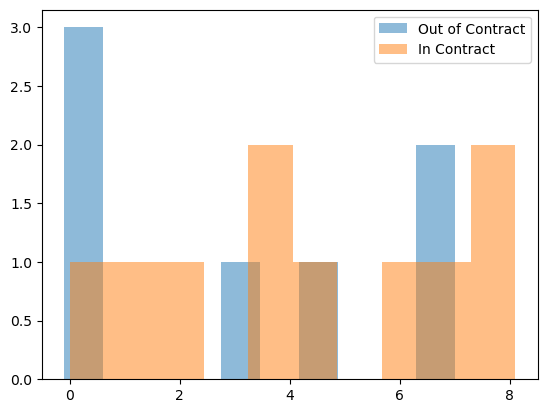

In [86]:
from matplotlib import pyplot as plt
plt.hist(group1, label='Out of Contract', alpha=0.5)
plt.hist(group2, label='In Contract', alpha=0.5)
plt.legend()

# Boxplot for group1 and group2 

# plt.boxplot([group1, group2], labels=['Out of Contract', 'In Contract'])

In [87]:
group1 = data[data['out_of_contract'] == True]['WAR']
group2 = data[data['out_of_contract'] == False]['WAR']

t_statistic, p_value = stats.ttest_ind(group1, group2, nan_policy='omit')

print(f"T-statistic: {t_statistic}, P-value: {p_value}")

T-statistic: 2.2177021592263095, P-value: 0.027286104430405234
